In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fahcridata/datapertambangan.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
from scipy import stats

In [3]:
df0 = pd.read_csv('../input/fahcridata/datapertambangan.csv')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Emitten                  3 non-null      object 
 1   DER                      3 non-null      float64
 2   Operating profit margin  3 non-null      float64
 3   sales growth             3 non-null      float64
 4   Return On Asset          3 non-null      float64
 5    Category                0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 272.0+ bytes


In [4]:
df0.describe()

,DER,Operating profit margin,sales growth,Return On Asset,Category
count,3.000000,3.000000,3.000000,3.000000,0.0
mean,2.054751,0.337073,0.715809,12.657267,NaN
std,1.541774,0.769758,0.653542,14.475806,NaN
min,0.484731,-0.339042,-0.038650,-0.328694,NaN
25%,1.298810,-0.081795,0.519939,4.853570,NaN
50%,2.112888,0.175453,1.078529,10.035834,NaN
75%,2.839761,0.675131,1.093039,19.150248,NaN
max,3.566634,1.174809,1.107550,28.264663,NaN


In [5]:
df0.drop(["Emitten"," Category"], axis=1, inplace=True)

<Figure size 1080x1080 with 0 Axes>

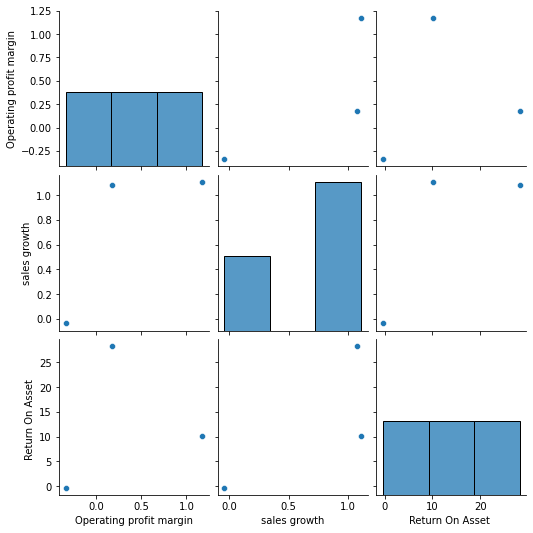

In [6]:
plt.figure(figsize=(15, 15))
sns.pairplot(df0, vars = df0.columns[1:13]);

In [7]:
df0 = pd.read_csv('../input/fahcridata/datapertambangan.csv')
df1 = df0[['DER','Operating profit margin' ,'sales growth','Return On Asset ',' Category']]
df1.describe()

,DER,Operating profit margin,sales growth,Return On Asset,Category
count,3.000000,3.000000,3.000000,3.000000,0.0
mean,2.054751,0.337073,0.715809,12.657267,NaN
std,1.541774,0.769758,0.653542,14.475806,NaN
min,0.484731,-0.339042,-0.038650,-0.328694,NaN
25%,1.298810,-0.081795,0.519939,4.853570,NaN
50%,2.112888,0.175453,1.078529,10.035834,NaN
75%,2.839761,0.675131,1.093039,19.150248,NaN
max,3.566634,1.174809,1.107550,28.264663,NaN


<AxesSubplot:xlabel='Emitten', ylabel='Operating profit margin'>

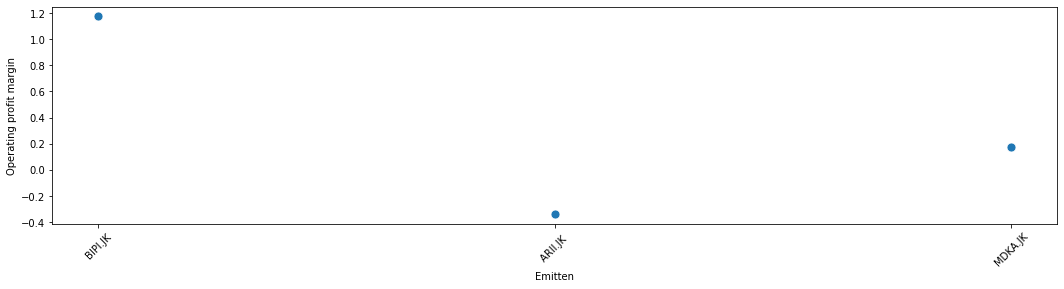

In [8]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Operating profit margin', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='DER'>

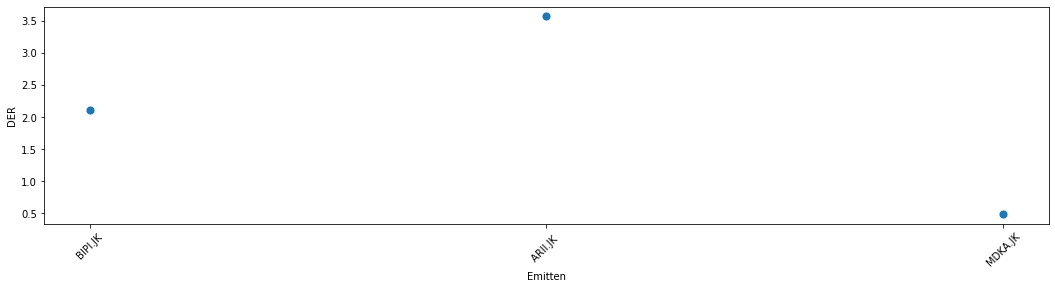

In [9]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='DER', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='sales growth'>

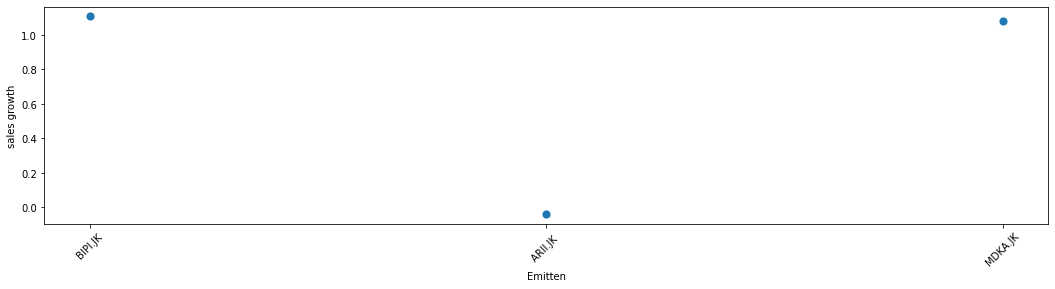

In [10]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='sales growth', 
                data=df0, s=80)

In [11]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([False] * len(df1))
for col in ['Operating profit margin']:
    zscore = abs(stats.zscore(df1[col]))
    filtered_entries = (zscore < 3) | filtered_entries
    
df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 3
Jumlah baris setelah memfilter outlier: 3


In [12]:
feats = ['DER','Operating profit margin','sales growth']
X = df1[feats].values
y = df1[' Category'].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,DER,Operating profit margin,sales growth
count,3.000000,3.000000e+00,3.000000e+00
mean,0.000000,3.700743e-17,1.850372e-16
std,1.224745,1.224745e+00,1.224745e+00
min,-1.247183,-1.075752e+00,-1.413865e+00
25%,-0.600500,-6.664516e-01,-3.670628e-01
50%,0.046183,-2.571512e-01,6.797393e-01
75%,0.623592,5.378760e-01,7.069325e-01
max,1.201000,1.332903e+00,7.341257e-01


In [13]:
df1.describe()

,DER,Operating profit margin,sales growth,Return On Asset,Category
count,3.000000,3.000000,3.000000,3.000000,0.0
mean,2.054751,0.337073,0.715809,12.657267,NaN
std,1.541774,0.769758,0.653542,14.475806,NaN
min,0.484731,-0.339042,-0.038650,-0.328694,NaN
25%,1.298810,-0.081795,0.519939,4.853570,NaN
50%,2.112888,0.175453,1.078529,10.035834,NaN
75%,2.839761,0.675131,1.093039,19.150248,NaN
max,3.566634,1.174809,1.107550,28.264663,NaN


In [14]:
from sklearn.cluster import KMeans
wcss=[]

In [15]:
df0.shape

(3, 6)

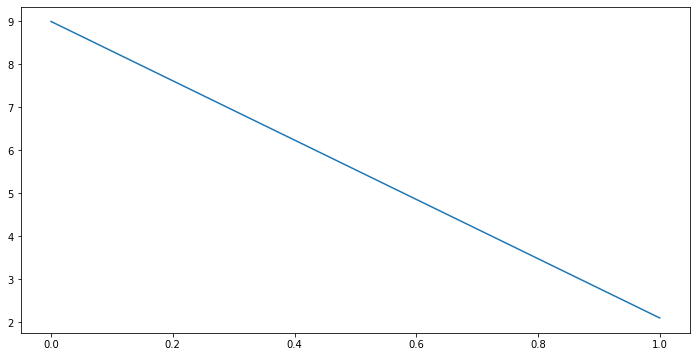

In [16]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 3):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_df.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia) #Elbow Method

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=2, random_state=0)

In [18]:
new_df['target'] = y
new_df['fit'] = kmeans.labels_

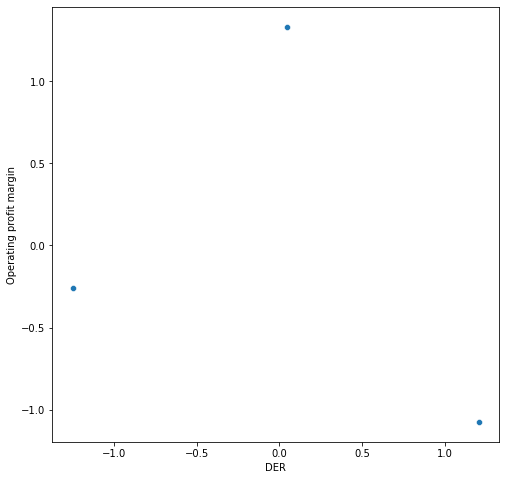

In [19]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='DER', y='Operating profit margin', hue=new_df.target.to_list(), data=new_df);

In [20]:
new_df.head(5)

,DER,Operating profit margin,sales growth,target,fit
0,0.046183,1.332903,0.734126,NaN,0
1,1.201000,-1.075752,-1.413865,NaN,1
2,-1.247183,-0.257151,0.679739,NaN,0


In [21]:
new_df.insert(0," Category",np.nan,True)
new_df.loc[new_df['fit'] == 0, ' Category'] = 2
new_df.loc[new_df['fit'] == 1, ' Category'] = 4
new_df.loc[new_df['fit'] == 2, ' Category'] = 1
new_df.loc[new_df['fit'] == 3, ' Category'] = 0
new_df.loc[new_df['fit'] == 4, ' Category'] = 3
new_df[' Category'] = new_df[' Category'].astype(int)
new_df.head(5)

,Category,DER,Operating profit margin,sales growth,target,fit
0,2,0.046183,1.332903,0.734126,NaN,0
1,4,1.201000,-1.075752,-1.413865,NaN,1
2,2,-1.247183,-0.257151,0.679739,NaN,0


In [22]:
new_df.drop(["fit","target"], axis=1, inplace=True)
new_df.columns = [' Category','DER (St.)','Operating profit margin (St.)', 'sales growth (St.)']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Category                      3 non-null      int64  
 1   DER (St.)                      3 non-null      float64
 2   Operating profit margin (St.)  3 non-null      float64
 3   sales growth (St.)             3 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 224.0 bytes


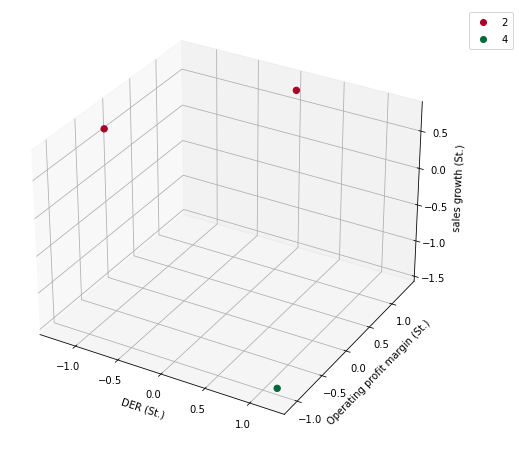

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_df['DER (St.)']
y = new_df['Operating profit margin (St.)']
z = new_df['sales growth (St.)']

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating profit margin (St.)")
ax.set_zlabel("sales growth (St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_df[' Category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

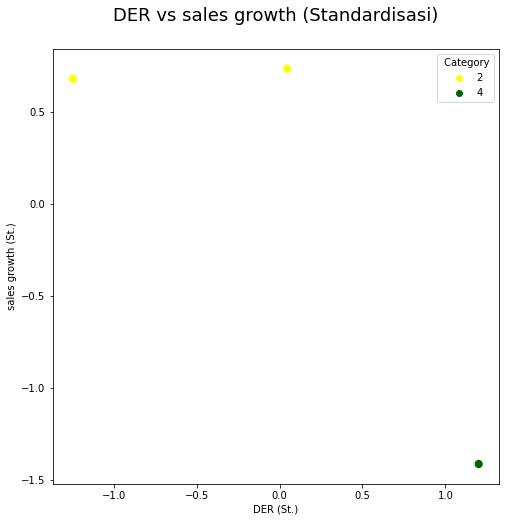

In [24]:
# color palette as dictionary
palette = {0:"tab:red",
           1:"tab:orange", 
           2:"yellow",
           3:"lime",
           4:"darkgreen"}

sns.scatterplot(x='DER (St.)', y='sales growth (St.)', 
                hue=' Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs sales growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

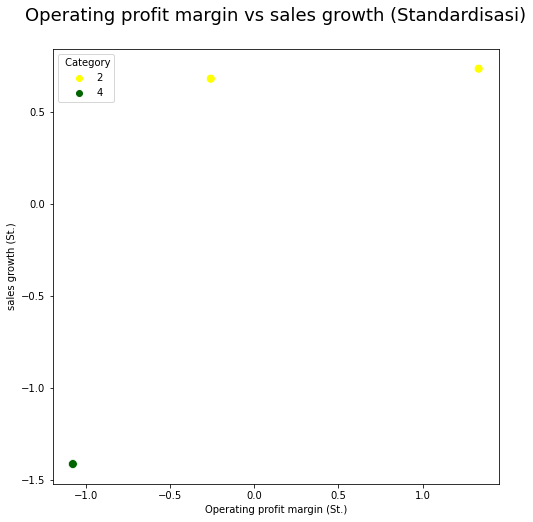

In [25]:
sns.scatterplot(x='Operating profit margin (St.)', y='sales growth (St.)', 
                hue=' Category', data=new_df, s=80,
                palette=palette)
plt.title("Operating profit margin vs sales growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

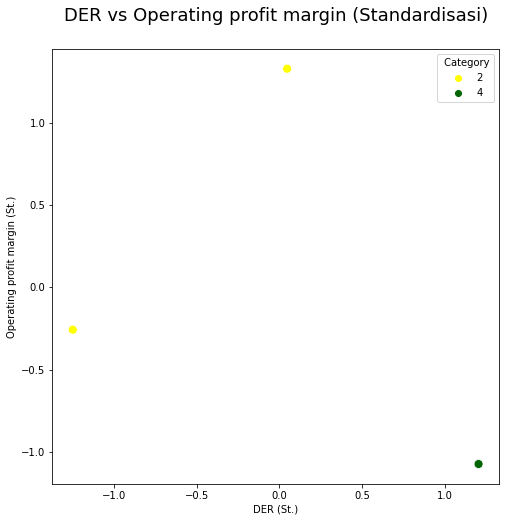

In [26]:
sns.scatterplot(x='DER (St.)', y='Operating profit margin (St.)', 
                hue=' Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Operating profit margin (Standardisasi)", fontsize=18, y=1.05)
plt.show()

In [27]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Emitten                  3 non-null      object 
 1   DER                      3 non-null      float64
 2   Operating profit margin  3 non-null      float64
 3   sales growth             3 non-null      float64
 4   Return On Asset          3 non-null      float64
 5    Category                0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 272.0+ bytes


In [28]:
dftemp = pd.read_csv('../input/fahcridata/datapertambangan.csv')
df = pd.concat([dftemp, new_df, df0], axis=1)
df.head(6)

,Emitten,DER,Operating profit margin,sales growth,Return On Asset,Category,Category,DER (St.),Operating profit margin (St.),sales growth (St.),Emitten,DER,Operating profit margin,sales growth,Return On Asset,Category
0,BIPI.JK,2.112888,1.174809,1.107550,10.035834,NaN,2,0.046183,1.332903,0.734126,BIPI.JK,2.112888,1.174809,1.107550,10.035834,NaN
1,ARII.JK,3.566634,-0.339042,-0.038650,-0.328694,NaN,4,1.201000,-1.075752,-1.413865,ARII.JK,3.566634,-0.339042,-0.038650,-0.328694,NaN
2,MDKA.JK,0.484731,0.175453,1.078529,28.264663,NaN,2,-1.247183,-0.257151,0.679739,MDKA.JK,0.484731,0.175453,1.078529,28.264663,NaN


In [29]:
df.to_csv('result.csv', index = False)

In [30]:
kmeans.cluster_centers_

array([[-0.60050011,  0.53787599,  0.70693246],
       [ 1.20100022, -1.07575197, -1.41386493]])

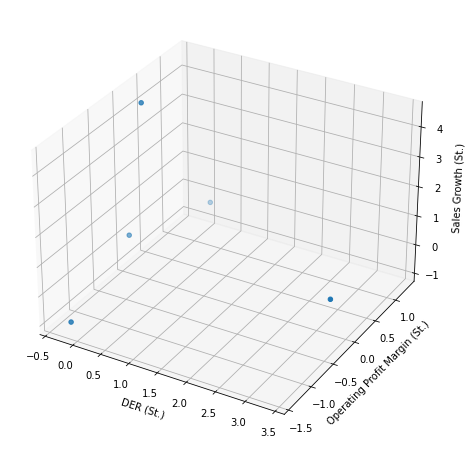

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = [0.07796577,3.3825386,-0.19978728,-0.22183117,-0.32525515]
y = [1.27721216,-0.22442569,-1.39490532,0.15549501,-0.03911061]
z = [-0.22773712,0.35006475,-0.89274149,4.44060221,0.14030381]

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")
ax.scatter(x, y, z)
plt.show()